In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_51cbd8ac4f124ba699737e1f03820b07 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='OCLLEBmN7RDIaJmBqGSYBTUph-f6KSyKoQUz_96eAHsK',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_51cbd8ac4f124ba699737e1f03820b07.get_object(Bucket='qmssdseprojectspring2020-donotdelete-pr-goevnou6fbaikq',Key='complaints.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
1,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,NaN,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500
2,2019-10-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I would like to request the suppression of the...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,937XX,NaN,Consent provided,Web,2019-10-25,Closed with explanation,Yes,NaN,3417821
3,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198
4,2019-02-08,Vehicle loan or lease,Lease,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,HYUNDAI CAPITAL AMERICA,FL,33161,NaN,Consent not provided,Web,2019-02-08,Closed with non-monetary relief,Yes,NaN,3146310


In [3]:
df_data_1.groupby(['Product', 'Company response to consumer']).size().sort_values(ascending=False)

Product                                                                       Company response to consumer   
Credit reporting, credit repair services, or other personal consumer reports  Closed with explanation            262227
Mortgage                                                                      Closed with explanation            251498
Debt collection                                                               Closed with explanation            227296
Credit reporting                                                              Closed with explanation            100360
Credit reporting, credit repair services, or other personal consumer reports  Closed with non-monetary relief     66055
Bank account or service                                                       Closed with explanation             57059
Credit card                                                                   Closed with explanation             53644
Student loan                                      

In [2]:
df_data_1.groupby(['Company response to consumer']).size().sort_values(ascending=False)

Company response to consumer
Closed with explanation            1164829
Closed with non-monetary relief     191641
Closed with monetary relief          82747
Closed without relief                17868
Closed                               17611
In progress                           8361
Untimely response                     7046
Closed with relief                    5304
dtype: int64

In [4]:
df_data_2 = df_data_1.loc[df_data_1['Product'] == 'Mortgage']
df_data_2.shape

#df_data_3 = df_data_2.sample(n = 5000, random_state = 0)
#df_data_3.shape

(5000, 18)

In [7]:
col = ['Company response to consumer', 'Consumer complaint narrative']
df = df_data_2[col]
df = df[pd.notnull(df['Consumer complaint narrative'])]

In [8]:
df.groupby(['Company response to consumer']).size().sort_values(ascending=False)

Company response to consumer
Closed with explanation            55829
Closed with monetary relief         2367
Closed with non-monetary relief     2361
Closed                               737
Untimely response                    185
dtype: int64

In [13]:
min_n = df.groupby(['Company response to consumer']).size().min()

df1 = df.loc[df['Company response to consumer'] == 'Closed with explanation'].sample(n = min_n, random_state = 0)
df2 = df.loc[df['Company response to consumer'] == 'Closed with monetary relief'].sample(n = min_n, random_state = 0)
df3 = df.loc[df['Company response to consumer'] == 'Closed with non-monetary relief'].sample(n = min_n, random_state = 0)
df4 = df.loc[df['Company response to consumer'] == 'Closed'].sample(n = min_n, random_state = 0)
df5 = df.loc[df['Company response to consumer'] == 'Untimely response'].sample(n = min_n, random_state = 0)

df_new = df1.append([df2, df3, df4, df5])

In [14]:
df_new['category_id'] = df_new['Company response to consumer'].factorize()[0]
category_id_df = df_new[['Company response to consumer', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Company response to consumer']].values)

In [15]:
category_to_id

{'Closed with explanation': 0,
 'Closed with monetary relief': 1,
 'Closed with non-monetary relief': 2,
 'Closed': 3,
 'Untimely response': 4}

In [18]:
id_to_category

{0: 'Closed with explanation',
 1: 'Closed with non-monetary relief',
 2: 'Closed with monetary relief',
 3: 'Untimely response',
 4: 'Closed'}

In [16]:
df_new.columns = ['Company_response_to_consumer', 'Consumer_complaint_narrative', 'category_id']
category_id_df.columns = ['Company_response_to_consumer', 'category_id']

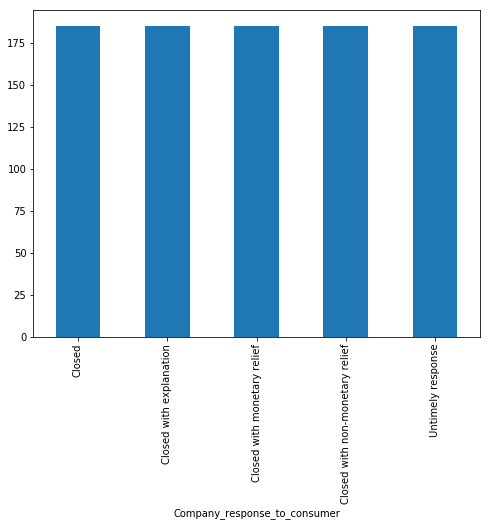

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_new.groupby('Company_response_to_consumer').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

# Text classifier

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df_new.Consumer_complaint_narrative).toarray()
labels = df_new.category_id
features.shape

(925, 4205)

In [21]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Company_response_to_consumer, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Company_response_to_consumer))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Closed':
  . Most correlated unigrams:
. pnc
. ocwen
  . Most correlated bigrams:
. pnc mortgage
. planet home
# 'Closed with explanation':
  . Most correlated unigrams:
. cooper
. shellpoint
  . Most correlated bigrams:
. carrington mortgage
. mr cooper
# 'Closed with monetary relief':
  . Most correlated unigrams:
. fee
. closing
  . Most correlated bigrams:
. 500 00
. lender credit
# 'Closed with non-monetary relief':
  . Most correlated unigrams:
. america
. regions
  . Most correlated bigrams:
. green tree
. bank america
# 'Untimely response':
  . Most correlated unigrams:
. kids
. capital
  . Most correlated bigrams:
. mortgage corp
. hard inquiry


# Training the classifier

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df_new['Consumer_complaint_narrative'], df_new['Company_response_to_consumer'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [26]:
print(clf.predict(count_vect.transform(["My mortgage company sold my loan to another company. I did not make the final payment for the current month within the usual 15 day grace period. When this happens, I pay the late fee ( {$100.00} ) and the regular payment. With the transfer of companies, I have not been able to pay my mortgage. XXXX, I have called my former/original mortgage company to pay, and I have been put on hold for over 15 minutes only to have the call hang up. XXXX, I tried to pay via the former mortgage companies speed pay \ website option and been unsuccessful because it would say  unable to process . I know i would not be penalized if I sent a payment to the former mortgage company, but I am unable to send them the payment. The new company takes over on XXXX XXXX. I can not pay them yet. Even if I pay my payment for XXXX after XXXX XXXX, it would be over a month late. But I have been unable to do otherwise because I can not speak to anyone at my former mortgage company."])))



['Untimely response']


In [28]:
df_new[df_new['Consumer_complaint_narrative'] == "My mortgage company sold my loan to another company. I did not make the final payment for the current month within the usual 15 day grace period. When this happens, I pay the late fee ( {$100.00} ) and the regular payment. With the transfer of companies, I have not been able to pay my mortgage. XXXX, I have called my former/original mortgage company to pay, and I have been put on hold for over 15 minutes only to have the call hang up. XXXX, I tried to pay via the former mortgage companies speed pay \ website option and been unsuccessful because it would say  unable to process . I know i would not be penalized if I sent a payment to the former mortgage company, but I am unable to send them the payment. The new company takes over on XXXX XXXX. I can not pay them yet. Even if I pay my payment for XXXX after XXXX XXXX, it would be over a month late. But I have been unable to do otherwise because I can not speak to anyone at my former mortgage company."]

,Company_response_to_consumer,Consumer_complaint_narrative,category_id


In [23]:
df_new.tail()

,Company_response_to_consumer,Consumer_complaint_narrative,category_id
965868,Untimely response,I was contacted by XXXX XXXX and XXXX XXXX thr...,4
544499,Untimely response,XXXX XXXX of XXXX XXXX in arizona is cr...,4
1221550,Untimely response,My mortgage company sold my loan to another co...,4
317215,Untimely response,On XX/XX/XXXX I received correspondence via ma...,4
1423301,Untimely response,Tips for Getting Started consumers financial p...,4


In [32]:
df_new.Consumer_complaint_narrative.iloc[-250]
df_new.Company_response_to_consumer.iloc[-250]

'Closed'

In [31]:
print(clf.predict(count_vect.transform(["1. My wife and I, both XXXX, foolishly signed papers pretending to sell our house in order to prevent foreclosure. \n2. We want to clear the title, loan still in my name, resume mortgage payments, now considerably reduced. \n3. Do not include sensitive information like your name, contact information, account number, or social security number in this field. So what  my information \'\' can I give you? \n4. 2008 $ XXXX mortgage5. Review?"])))

['Closed']


# Other models

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linea

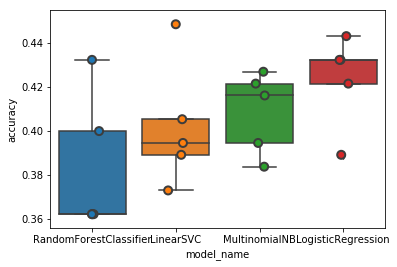

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [34]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.402162
LogisticRegression        0.423784
MultinomialNB             0.408649
RandomForestClassifier    0.383784
Name: accuracy, dtype: float64

# Linear SVC

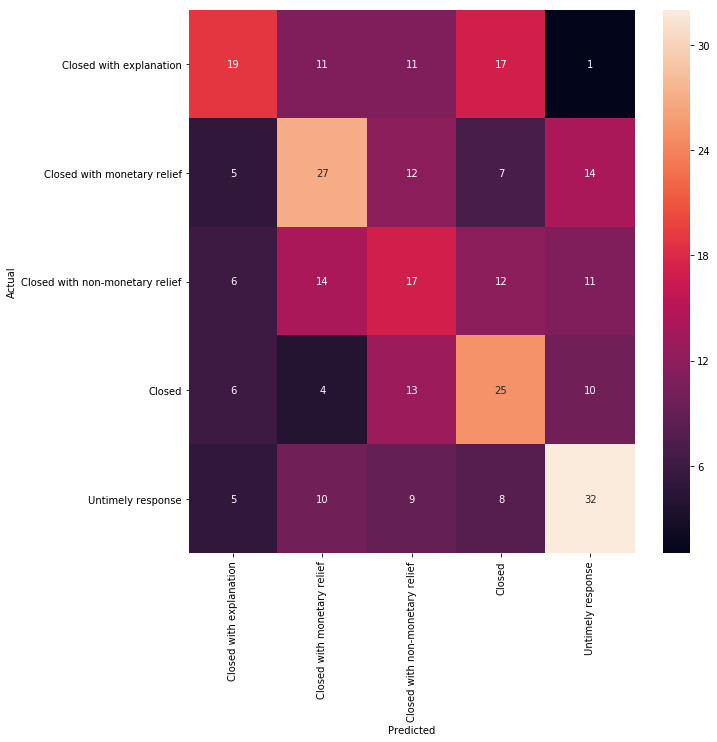

In [35]:
model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_new.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Company_response_to_consumer.values, yticklabels=category_id_df.Company_response_to_consumer.values)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report

In [36]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, target_names=df_new['Company_response_to_consumer'].unique()))

                                 precision    recall  f1-score   support

        Closed with explanation       0.46      0.32      0.38        59
    Closed with monetary relief       0.41      0.42      0.41        65
Closed with non-monetary relief       0.27      0.28      0.28        60
                         Closed       0.36      0.43      0.39        58
              Untimely response       0.47      0.50      0.48        64

                      micro avg       0.39      0.39      0.39       306
                      macro avg       0.40      0.39      0.39       306
                   weighted avg       0.40      0.39      0.39       306



In [47]:
y

,Company_response_to_consumer,Consumer_complaint_narrative,category_id
1265873,Closed with explanation,My complaint numbers are:XXXX and XXXX. \nWe f...,0
290514,Closed with explanation,New York community bank aka Ohio savings bank ...,0
1179065,Closed with explanation,"On XXXX/XXXX/2012, I sold my home via a cash s...",0
1166140,Closed with explanation,Back in 2010 I asked BOA for a loan modificati...,0
511929,Closed with explanation,"Hi, I filed this complaint because I don't wan...",0
